In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from cycler import cycler
%matplotlib inline

In [2]:
p_num = 50
param_lis = ["param0", "param1", "param2", "param3", "param4"]

office_ivt = np.empty([5, p_num*18])
supermarket_ivt = np.empty([5, p_num*18])
office_idt = np.empty([5, p_num*18])
supermarket_idt = np.empty([5, p_num*18])
office_ivdt = np.empty([5, p_num*18])
supermarket_ivdt = np.empty([5, p_num*18])

for i, param in enumerate(param_lis):
    for p in range(0, p_num): # パラメータごとに精度を取得
        office_ivt_acc = pd.read_csv(f"../param/exp_init_param/ivtl_80deg_160ms/{param}/{p}/result_office.csv")["error"].values
        supermarket_ivt_acc = pd.read_csv(f"../param/exp_init_param/ivtl_80deg_160ms/{param}/{p}/result_supermarket.csv")["error"].values        
        office_idt_acc = pd.read_csv(f"../param/exp_init_param/idt_07deg_160ms/{param}/{p}/result_office.csv")["error"].values        
        supermarket_idt_acc = pd.read_csv(f"../param/exp_init_param/idt_07deg_160ms/{param}/{p}/result_supermarket.csv")["error"].values
        office_ivdt_acc = pd.read_csv(f"../param/exp_init_param/ivdt_80deg_07deg_160ms/{param}/{p}/result_office.csv")["error"].values        
        supermarket_ivdt_acc = pd.read_csv(f"../param/exp_init_param/ivdt_80deg_07deg_160ms/{param}/{p}/result_supermarket.csv")["error"].values
        
        office_ivt[i, p*18:(p+1)*18] = office_ivt_acc
        supermarket_ivt[i, p*18:(p+1)*18] = supermarket_ivt_acc       
        office_idt[i, p*18:(p+1)*18] = office_idt_acc
        supermarket_idt[i, p*18:(p+1)*18] = supermarket_idt_acc
        office_ivdt[i, p*18:(p+1)*18] = office_ivdt_acc
        supermarket_ivdt[i, p*18:(p+1)*18] = supermarket_ivdt_acc

office_ivt.shape

(5, 900)

In [3]:
# mean
office_idt_mean = np.mean(office_idt, axis=1)
supermarket_idt_mean = np.mean(supermarket_idt, axis=1)
office_ivt_mean = np.mean(office_ivt, axis=1)
supermarket_ivt_mean = np.mean(supermarket_ivt, axis=1)
office_ivdt_mean = np.mean(office_ivdt, axis=1)
supermarket_ivdt_mean = np.mean(supermarket_ivdt, axis=1)

# standard error
office_idt_se = np.std(office_idt, axis=1) / np.sqrt(office_idt.shape[1])
supermarket_idt_se = np.std(supermarket_idt, axis=1) / np.sqrt(supermarket_idt.shape[1])
office_ivt_se = np.std(office_ivt, axis=1) / np.sqrt(office_ivt.shape[1])
supermarket_ivt_se = np.std(supermarket_ivt, axis=1) / np.sqrt(supermarket_ivt.shape[1])
office_ivdt_se = np.std(office_ivdt, axis=1) / np.sqrt(office_ivdt.shape[1])
supermarket_ivdt_se = np.std(supermarket_ivdt, axis=1) / np.sqrt(supermarket_ivdt.shape[1])

print(office_ivt_mean, supermarket_ivt_mean)
print(office_idt_mean, supermarket_idt_mean)
print(office_ivdt_mean, supermarket_ivdt_mean)

[2.59699648 2.60726677 2.6948834  2.75460719 2.79756401] [3.58398107 3.58038533 3.58449336 3.59533589 3.55480307]
[1.53109629 1.90065787 2.57523617 3.23910717 3.90697158] [1.74058149 2.15673535 2.72161803 3.40643728 4.11256612]
[1.55796277 1.86525494 2.53382544 3.18871315 3.7820159 ] [1.73166776 2.23217013 2.76728122 3.39748489 3.98965436]


## Office envirionment

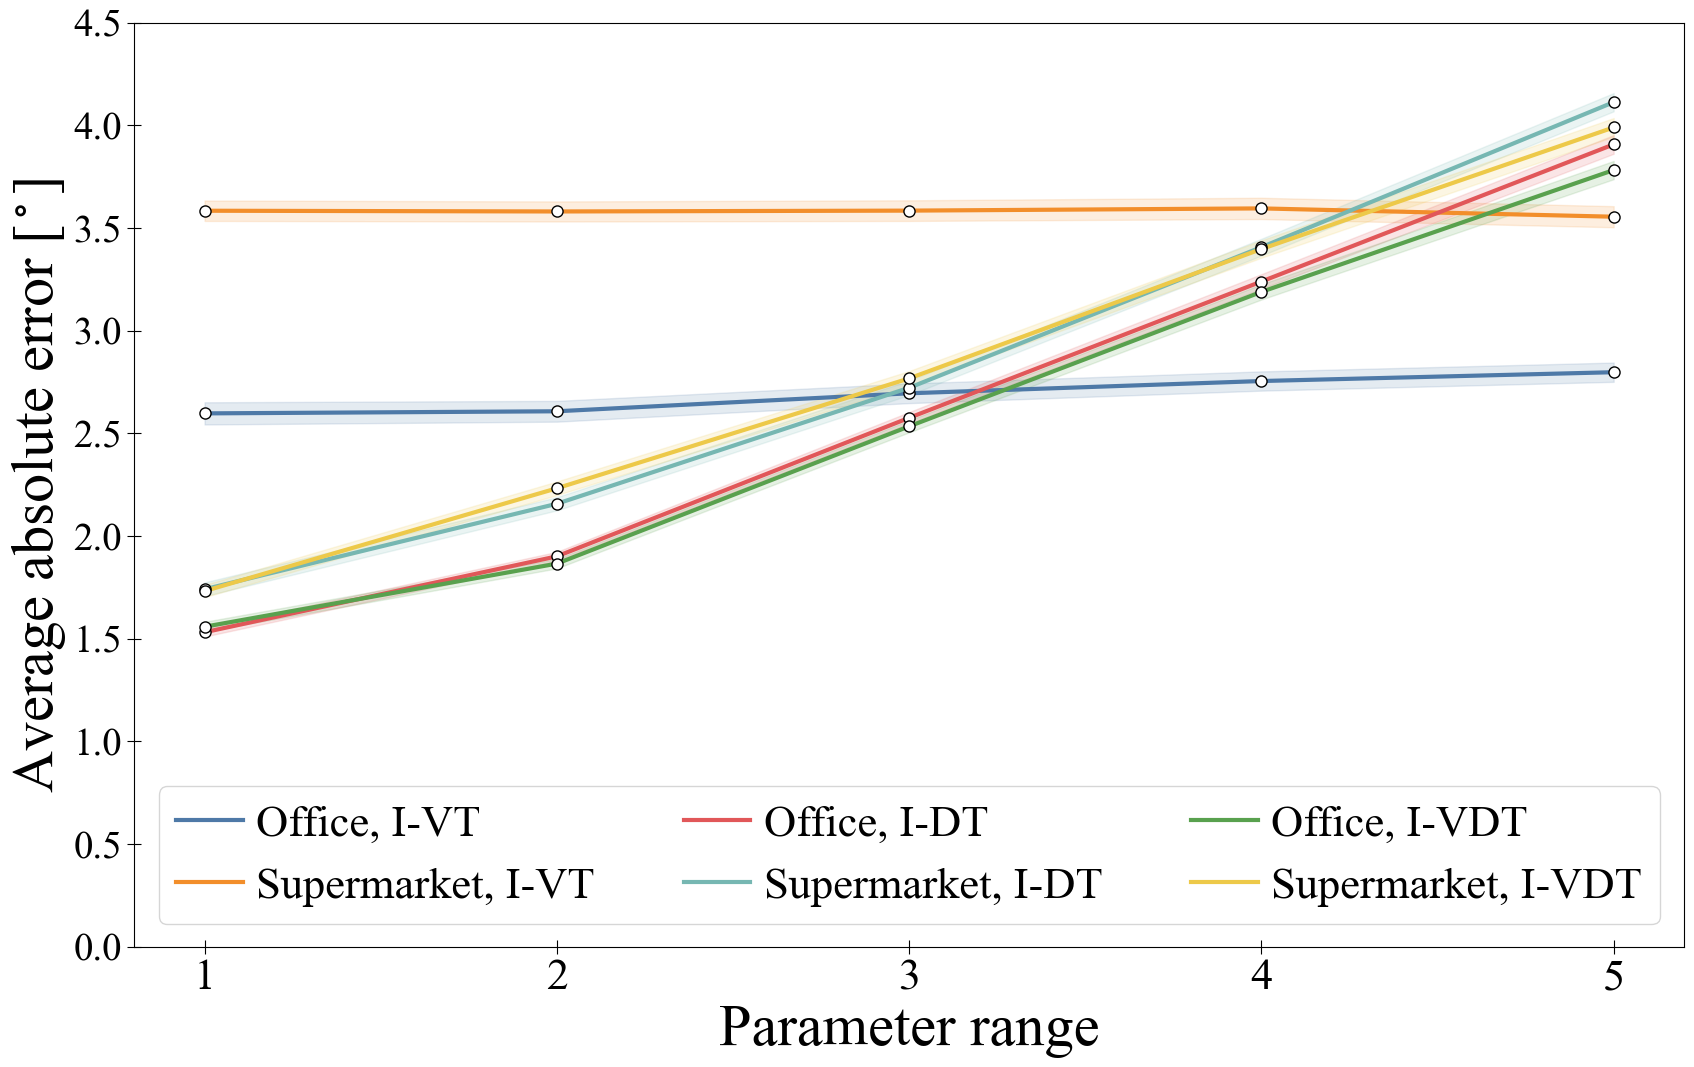

In [4]:
font_size = 42

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['axes.prop_cycle']  = cycler(color=['#4E79A7', '#F28E2B', '#E15759', '#76B7B2','#59A14E', '#EDC949','#B07AA2','#FF9DA7','#9C755F','#BAB0AC'])
fig = plt.figure(figsize=(20, 12))
fig.patch.set_facecolor("white")

x_lis = range(len(param_lis))
plt.plot(x_lis, office_ivt_mean, c="C0", label="Office, I-VT", linewidth=3)
plt.errorbar(x_lis, office_ivt_mean, fmt="o", color="white", markeredgecolor="k", ecolor="k", markersize=8)
plt.fill_between(x_lis, office_ivt_mean+office_ivt_se, office_ivt_mean-office_ivt_se, color="C0", alpha=0.15)

plt.plot(x_lis, supermarket_ivt_mean, c="C1", label="Supermarket, I-VT", linewidth=3)
plt.errorbar(x_lis, supermarket_ivt_mean, fmt="o", color="white", markeredgecolor="k", ecolor="k", markersize=8)
plt.fill_between(x_lis, supermarket_ivt_mean+supermarket_ivt_se, supermarket_ivt_mean-supermarket_ivt_se, color="C1", alpha=0.15)

plt.plot(x_lis, office_idt_mean, c="C2", label="Office, I-DT", linewidth=3)
plt.errorbar(x_lis, office_idt_mean, fmt="o", color="white", markeredgecolor="k", ecolor="k", markersize=8)
plt.fill_between(x_lis, office_idt_mean+office_idt_se, office_idt_mean-office_idt_se, color="C2", alpha=0.15)

plt.plot(x_lis, supermarket_idt_mean, c="C3", label="Supermarket, I-DT", linewidth=3)
plt.errorbar(x_lis, supermarket_idt_mean, fmt="o", color="white", markeredgecolor="k", ecolor="k", markersize=8)
plt.fill_between(x_lis, supermarket_idt_mean+supermarket_idt_se, supermarket_idt_mean-supermarket_idt_se, color="C3", alpha=0.15)

plt.plot(x_lis, office_ivdt_mean, c="C4", label="Office, I-VDT", linewidth=3)
plt.errorbar(x_lis, office_ivdt_mean, fmt="o", color="white", markeredgecolor="k", ecolor="k", markersize=8)
plt.fill_between(x_lis, office_ivdt_mean+office_ivdt_se, office_ivdt_mean-office_ivdt_se, color="C4", alpha=0.15)

plt.plot(x_lis, supermarket_ivdt_mean, c="C5", label="Supermarket, I-VDT", linewidth=3)
plt.errorbar(x_lis, supermarket_ivdt_mean, fmt="o", color="white", markeredgecolor="k", ecolor="k", markersize=8)
plt.fill_between(x_lis, supermarket_ivdt_mean+supermarket_ivdt_se, supermarket_ivdt_mean-supermarket_ivdt_se, color="C5", alpha=0.15)

label_x = ["1", "2", "3", "4", "5"]
plt.xticks([i for i in x_lis], label_x, fontsize=32)
plt.yticks(fontsize=28)
plt.tick_params(direction = "inout", length=10)

plt.ylim(0.0, 4.5)
plt.xlabel("Parameter range", size=font_size)
plt.ylabel(r"Average absolute error [$^\circ$]", size=font_size)
plt.legend(loc='lower center', ncol=3, handlelength=1.5, handletextpad=0.3, fontsize=32)
plt.savefig("../figures/param_result.png",bbox_inches='tight')